In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload

%autoreload 2
import fancyimpute as ft
import seaborn as sns
import missingno as mn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
cd GCP/

[Errno 2] No such file or directory: 'GCP/'
/home/krishna/Desktop/MultiomicsDM/LINCS data/GCP


In [84]:
import glob
import codecs
lincs_gcp = {}
for f in glob.glob('*.gct'):
    a = f.split('_annotated')
    name = str(a[0])
    reading_file =  doc1 = codecs.open(f,'UTF-16') #open for reading with "universal" type set
    lincs_gcp[name] = pd.read_csv(reading_file, sep='\t', skiprows=2)

cell_id = {}

for f in lincs_gcp.keys():
#     print f
    header_index = (lincs_gcp[f].index[lincs_gcp[f]['id'] =='pert_iname'])[0]
    cell_id[f] = lincs_gcp[f].iloc[(lincs_gcp[f].index[lincs_gcp[f]['id'] =='cell_id'])[0]][-1]
    
#     print header_index
    lincs_gcp[f].columns = lincs_gcp[f].iloc[header_index]

In [85]:
gcp_keys = lincs_gcp.keys()

In [86]:
for f in gcp_keys:
    lincs_gcp[f].columns = lincs_gcp[f].columns.fillna('to_drop')
    
    print f
    #Fill nan to to_prop, in next step drop these columns     
    lincs_gcp[f].drop('to_drop', axis = 1, inplace = True)
    rowstoremove       = lincs_gcp[f]['pert_iname'].tolist()
    first_header_index = rowstoremove.index('det_well')
    first_header       = lincs_gcp[f].iloc[first_header_index].tolist()
    remove_rows_until_this_index = rowstoremove.index('BI10003')
    lincs_gcp[f]    = lincs_gcp[f][remove_rows_until_this_index:]

#     i = 0
#     drug = lincs_p100[f].columns[1:][0]
#     header_list = ['Drugs_plate']
#     for col in lincs_p100[f].columns[1:]:

#         if (drug==col):
#             i=i+1
        
#         else:
#             i = 1
#             drug = col
#         header_list.append(col+'_'+str(i))
    tups = zip(first_header,lincs_gcp[f].columns)
    lincs_gcp[f].columns = pd.MultiIndex.from_tuples(tups)



LINCS_GCP_Plate46
LINCS_GCP_Plate59
LINCS_GCP_Plate58
LINCS_GCP_Plate53
LINCS_GCP_Plate52
LINCS_GCP_Plate51
LINCS_GCP_Plate35
LINCS_GCP_Plate34
LINCS_GCP_Plate19
LINCS_GCP_Plate18
LINCS_GCP_Plate31
LINCS_GCP_Plate30
LINCS_GCP_Plate33
LINCS_GCP_Plate32
LINCS_GCP_Plate39
LINCS_GCP_Plate38
LINCS_GCP_Plate15
LINCS_GCP_Plate17
LINCS_GCP_PlateZ
LINCS_GCP_Plate61
LINCS_GCP_Plate41
LINCS_GCP_Plate42
LINCS_GCP_Plate25
LINCS_GCP_Plate44
LINCS_GCP_Plate23
LINCS_GCP_Plate20
LINCS_GCP_Plate47
LINCS_GCP_Plate48
LINCS_GCP_Plate28
LINCS_GCP_Plate29
LINCS_GCP_Plate27
LINCS_GCP_Plate24
LINCS_GCP_Plate22
LINCS_GCP_Plate45


In [88]:
for f in gcp_keys:
    for col in lincs_gcp[f].columns[1:]:    #Convert strings to numerical value
        print f, col
        lincs_gcp[f][col] = pd.to_numeric(lincs_gcp[f][col],  errors='coerce')
        

LINCS_GCP_Plate46 ('B1', 'DMSO')
LINCS_GCP_Plate46 ('B2', 'DMSO')
LINCS_GCP_Plate46 ('B3', 'DMSO')
LINCS_GCP_Plate46 ('C1', 'BIX-01294')
LINCS_GCP_Plate46 ('C2', 'BIX-01294')
LINCS_GCP_Plate46 ('C3', 'BIX-01294')
LINCS_GCP_Plate46 ('D1', 'CHIR-99021')
LINCS_GCP_Plate46 ('D2', 'CHIR-99021')
LINCS_GCP_Plate46 ('D3', 'CHIR-99021')
LINCS_GCP_Plate46 ('E1', 'Citalopram')
LINCS_GCP_Plate46 ('E2', 'Citalopram')
LINCS_GCP_Plate46 ('E3', 'Citalopram')
LINCS_GCP_Plate46 ('F1', 'Clozapine')
LINCS_GCP_Plate46 ('F2', 'Clozapine')
LINCS_GCP_Plate46 ('F3', 'Clozapine')
LINCS_GCP_Plate46 ('G1', 'MS-275')
LINCS_GCP_Plate46 ('G2', 'MS-275')
LINCS_GCP_Plate46 ('G3', 'MS-275')
LINCS_GCP_Plate46 ('H1', 'Lamotrigine')
LINCS_GCP_Plate46 ('H2', 'Lamotrigine')
LINCS_GCP_Plate46 ('H3', 'Lamotrigine')
LINCS_GCP_Plate46 ('A4', 'Lithium Chloride')
LINCS_GCP_Plate46 ('A5', 'Lithium Chloride')
LINCS_GCP_Plate46 ('A6', 'Lithium Chloride')
LINCS_GCP_Plate46 ('B4', 'Lurasidone')
LINCS_GCP_Plate46 ('B5', 'Lurasidone')
L

LINCS_GCP_Plate53 ('D1', 'BRD9_sg02')
LINCS_GCP_Plate53 ('D2', 'BRD9_sg02')
LINCS_GCP_Plate53 ('D3', 'BRD9_sg02')
LINCS_GCP_Plate53 ('D4', 'AKT1_sg01')
LINCS_GCP_Plate53 ('D5', 'AKT1_sg01')
LINCS_GCP_Plate53 ('D6', 'AKT1_sg01')
LINCS_GCP_Plate53 ('D7', 'BRD7_sg01')
LINCS_GCP_Plate53 ('D8', 'BRD7_sg01')
LINCS_GCP_Plate53 ('D9', 'BRD7_sg01')
LINCS_GCP_Plate53 ('D10', 'EGFP_sg01')
LINCS_GCP_Plate53 ('D11', 'EGFP_sg01')
LINCS_GCP_Plate53 ('D12', 'EGFP_sg01')
LINCS_GCP_Plate53 ('E1', 'BRD9_sg01')
LINCS_GCP_Plate53 ('E2', 'BRD9_sg01')
LINCS_GCP_Plate53 ('E3', 'BRD9_sg01')
LINCS_GCP_Plate53 ('E4', 'EZH2_sg01')
LINCS_GCP_Plate53 ('E5', 'EZH2_sg01')
LINCS_GCP_Plate53 ('E6', 'EZH2_sg01')
LINCS_GCP_Plate53 ('E7', 'SETDB1_sg01')
LINCS_GCP_Plate53 ('E8', 'SETDB1_sg01')
LINCS_GCP_Plate53 ('E9', 'SETDB1_sg01')
LINCS_GCP_Plate53 ('E10', 'BRD7_sg02')
LINCS_GCP_Plate53 ('E11', 'BRD7_sg02')
LINCS_GCP_Plate53 ('E12', 'BRD7_sg02')
LINCS_GCP_Plate53 ('F1', 'EHMT1_sg02')
LINCS_GCP_Plate53 ('F2', 'EHMT1_sg02'

LINCS_GCP_Plate35 ('A2', 'DMSO')
LINCS_GCP_Plate35 ('A3', 'DMSO')
LINCS_GCP_Plate35 ('A4', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A5', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A6', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A7', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A8', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A9', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A10', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A11', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('A12', 'vorinostat_HMS')
LINCS_GCP_Plate35 ('B1', 'Neratinib')
LINCS_GCP_Plate35 ('B2', 'Neratinib')
LINCS_GCP_Plate35 ('B3', 'Neratinib')
LINCS_GCP_Plate35 ('B4', 'Neratinib')
LINCS_GCP_Plate35 ('B5', 'Neratinib')
LINCS_GCP_Plate35 ('B6', 'Neratinib')
LINCS_GCP_Plate35 ('B7', 'Neratinib')
LINCS_GCP_Plate35 ('B8', 'Neratinib')
LINCS_GCP_Plate35 ('B9', 'Neratinib')
LINCS_GCP_Plate35 ('B10', 'DMSO')
LINCS_GCP_Plate35 ('B11', 'DMSO')
LINCS_GCP_Plate35 ('B12', 'DMSO')
LINCS_GCP_Plate35 ('C1', 'Dasatinib')
LINCS_GCP_Plate35 ('C2', 'Dasatinib')
LINCS_GCP_Plate35 ('C3',

LINCS_GCP_Plate18 ('D3', 'JQ1-S')
LINCS_GCP_Plate18 ('D4', 'UNC-0646')
LINCS_GCP_Plate18 ('D5', 'UNC-0646')
LINCS_GCP_Plate18 ('D6', 'UNC-0646')
LINCS_GCP_Plate18 ('D7', 'belinostat')
LINCS_GCP_Plate18 ('D8', 'belinostat')
LINCS_GCP_Plate18 ('D9', 'belinostat')
LINCS_GCP_Plate18 ('D10', 'salermide')
LINCS_GCP_Plate18 ('D11', 'salermide')
LINCS_GCP_Plate18 ('D12', 'salermide')
LINCS_GCP_Plate18 ('E1', 'zebularine')
LINCS_GCP_Plate18 ('E2', 'zebularine')
LINCS_GCP_Plate18 ('E3', 'zebularine')
LINCS_GCP_Plate18 ('E4', 'UNC-0321')
LINCS_GCP_Plate18 ('E5', 'UNC-0321')
LINCS_GCP_Plate18 ('E6', 'UNC-0321')
LINCS_GCP_Plate18 ('E7', 'methylstat')
LINCS_GCP_Plate18 ('E8', 'methylstat')
LINCS_GCP_Plate18 ('E9', 'methylstat')
LINCS_GCP_Plate18 ('E10', 'geldanamycin')
LINCS_GCP_Plate18 ('E11', 'geldanamycin')
LINCS_GCP_Plate18 ('E12', 'geldanamycin')
LINCS_GCP_Plate18 ('F1', 'decitabine')
LINCS_GCP_Plate18 ('F2', 'decitabine')
LINCS_GCP_Plate18 ('F3', 'decitabine')
LINCS_GCP_Plate18 ('F4', 'BIX-013

LINCS_GCP_Plate30 ('B3', 'staurosporine')
LINCS_GCP_Plate30 ('B2', 'staurosporine')
LINCS_GCP_Plate30 ('B1', 'staurosporine')
LINCS_GCP_Plate30 ('A12', 'EPZ004777')
LINCS_GCP_Plate30 ('A11', 'EPZ004777')
LINCS_GCP_Plate30 ('A10', 'EPZ004777')
LINCS_GCP_Plate30 ('A9', 'vorinostat')
LINCS_GCP_Plate30 ('A8', 'vorinostat')
LINCS_GCP_Plate30 ('A7', 'vorinostat')
LINCS_GCP_Plate30 ('A6', '1271738-62-5')
LINCS_GCP_Plate30 ('A5', '1271738-62-5')
LINCS_GCP_Plate30 ('A4', '1271738-62-5')
LINCS_GCP_Plate30 ('A3', 'LY-294002')
LINCS_GCP_Plate30 ('A2', 'LY-294002')
LINCS_GCP_Plate30 ('A1', 'LY-294002')
LINCS_GCP_Plate33 ('A1', 'DMSO')
LINCS_GCP_Plate33 ('A2', 'DMSO')
LINCS_GCP_Plate33 ('A3', 'DMSO')
LINCS_GCP_Plate33 ('A4', 'flavopiridol')
LINCS_GCP_Plate33 ('A5', 'flavopiridol')
LINCS_GCP_Plate33 ('A6', 'flavopiridol')
LINCS_GCP_Plate33 ('A7', 'CC-401')
LINCS_GCP_Plate33 ('A8', 'CC-401')
LINCS_GCP_Plate33 ('A9', 'CC-401')
LINCS_GCP_Plate33 ('A10', 'Pazopanib')
LINCS_GCP_Plate33 ('B1', 'Selumetinib

LINCS_GCP_Plate39 ('C9', 'tacrolimus')
LINCS_GCP_Plate39 ('C10', 'losmapimod')
LINCS_GCP_Plate39 ('C11', 'losmapimod')
LINCS_GCP_Plate39 ('C12', 'losmapimod')
LINCS_GCP_Plate39 ('D1', 'eplerenone')
LINCS_GCP_Plate39 ('D2', 'eplerenone')
LINCS_GCP_Plate39 ('D3', 'eplerenone')
LINCS_GCP_Plate39 ('D4', 'Resveratrol')
LINCS_GCP_Plate39 ('D5', 'Resveratrol')
LINCS_GCP_Plate39 ('D6', 'Resveratrol')
LINCS_GCP_Plate39 ('D7', 'curcumin')
LINCS_GCP_Plate39 ('D8', 'curcumin')
LINCS_GCP_Plate39 ('D9', 'curcumin')
LINCS_GCP_Plate39 ('D10', 'Pazopanib')
LINCS_GCP_Plate39 ('D11', 'Pazopanib')
LINCS_GCP_Plate39 ('D12', 'Pazopanib')
LINCS_GCP_Plate39 ('E1', 'losartan')
LINCS_GCP_Plate39 ('E2', 'losartan')
LINCS_GCP_Plate39 ('E3', 'losartan')
LINCS_GCP_Plate39 ('E4', 'geldanamycin')
LINCS_GCP_Plate39 ('E5', 'geldanamycin')
LINCS_GCP_Plate39 ('E6', 'geldanamycin')
LINCS_GCP_Plate39 ('E7', 'KN-62')
LINCS_GCP_Plate39 ('E8', 'KN-62')
LINCS_GCP_Plate39 ('E9', 'KN-62')
LINCS_GCP_Plate39 ('E10', 'Nilotinib')
L

LINCS_GCP_Plate17 ('A3', 'DMSO')
LINCS_GCP_Plate17 ('A4', 'gsk126')
LINCS_GCP_Plate17 ('A5', 'gsk126')
LINCS_GCP_Plate17 ('A6', 'gsk126')
LINCS_GCP_Plate17 ('A7', 'MS-275')
LINCS_GCP_Plate17 ('A8', 'MS-275')
LINCS_GCP_Plate17 ('A9', 'MS-275')
LINCS_GCP_Plate17 ('A10', 'OSI-027')
LINCS_GCP_Plate17 ('A11', 'OSI-027')
LINCS_GCP_Plate17 ('A12', 'OSI-027')
LINCS_GCP_Plate17 ('B1', 'GSK1210151A')
LINCS_GCP_Plate17 ('B2', 'GSK1210151A')
LINCS_GCP_Plate17 ('B3', 'GSK1210151A')
LINCS_GCP_Plate17 ('B4', 'EPZ-5687')
LINCS_GCP_Plate17 ('B5', 'EPZ-5687')
LINCS_GCP_Plate17 ('B6', 'EPZ-5687')
LINCS_GCP_Plate17 ('B7', 'CI-994')
LINCS_GCP_Plate17 ('B8', 'CI-994')
LINCS_GCP_Plate17 ('B9', 'CI-994')
LINCS_GCP_Plate17 ('B10', 'Resveratrol')
LINCS_GCP_Plate17 ('B11', 'Resveratrol')
LINCS_GCP_Plate17 ('B12', 'Resveratrol')
LINCS_GCP_Plate17 ('C1', 'GSK525762A')
LINCS_GCP_Plate17 ('C2', 'GSK525762A')
LINCS_GCP_Plate17 ('C3', 'GSK525762A')
LINCS_GCP_Plate17 ('C4', 'CPI-169')
LINCS_GCP_Plate17 ('C5', 'CPI-169'

LINCS_GCP_Plate61 ('E8', 'Carfilzomib')
LINCS_GCP_Plate61 ('E9', 'Carfilzomib')
LINCS_GCP_Plate61 ('E10', 'Vandetanib')
LINCS_GCP_Plate61 ('E11', 'Vandetanib')
LINCS_GCP_Plate61 ('E12', 'Vandetanib')
LINCS_GCP_Plate61 ('F1', 'Ceritinib')
LINCS_GCP_Plate61 ('F2', 'Ceritinib')
LINCS_GCP_Plate61 ('F3', 'Ceritinib')
LINCS_GCP_Plate61 ('F4', 'Doxorubicin')
LINCS_GCP_Plate61 ('F5', 'Doxorubicin')
LINCS_GCP_Plate61 ('F6', 'Doxorubicin')
LINCS_GCP_Plate61 ('F7', 'Milrinone')
LINCS_GCP_Plate61 ('F8', 'Milrinone')
LINCS_GCP_Plate61 ('F9', 'Milrinone')
LINCS_GCP_Plate61 ('F10', 'Ibrutinib')
LINCS_GCP_Plate61 ('F11', 'Ibrutinib')
LINCS_GCP_Plate61 ('F12', 'Ibrutinib')
LINCS_GCP_Plate61 ('G1', 'Crizotinib')
LINCS_GCP_Plate61 ('G2', 'Crizotinib')
LINCS_GCP_Plate61 ('G3', 'Crizotinib')
LINCS_GCP_Plate61 ('G4', 'Erlotinib')
LINCS_GCP_Plate61 ('G5', 'Erlotinib')
LINCS_GCP_Plate61 ('G6', 'Erlotinib')
LINCS_GCP_Plate61 ('G7', 'Olmesartan')
LINCS_GCP_Plate61 ('G8', 'Olmesartan')
LINCS_GCP_Plate61 ('G9', '

LINCS_GCP_Plate42 ('G10', 'SETD1B_sg01')
LINCS_GCP_Plate42 ('G11', 'SETD1B_sg01')
LINCS_GCP_Plate42 ('G12', 'SETD1B_sg01')
LINCS_GCP_Plate42 ('H1', 'KDM6A_sg02')
LINCS_GCP_Plate42 ('H2', 'KDM6A_sg02')
LINCS_GCP_Plate42 ('H3', 'KDM6A_sg02')
LINCS_GCP_Plate42 ('H4', 'CHD6_sg02')
LINCS_GCP_Plate42 ('H5', 'CHD6_sg02')
LINCS_GCP_Plate42 ('H6', 'CHD6_sg02')
LINCS_GCP_Plate42 ('H7', 'BRD8_sg01')
LINCS_GCP_Plate42 ('H8', 'BRD8_sg01')
LINCS_GCP_Plate42 ('H9', 'BRD8_sg01')
LINCS_GCP_Plate42 ('H10', 'NELFA_sg01')
LINCS_GCP_Plate42 ('H11', 'NELFA_sg01')
LINCS_GCP_Plate42 ('H12', 'NELFA_sg01')
LINCS_GCP_Plate25 ('A1', 'DMSO')
LINCS_GCP_Plate25 ('A2', 'DMSO')
LINCS_GCP_Plate25 ('A3', 'DMSO')
LINCS_GCP_Plate25 ('A4', 'tretinoin')
LINCS_GCP_Plate25 ('A5', 'tretinoin')
LINCS_GCP_Plate25 ('A6', 'tretinoin')
LINCS_GCP_Plate25 ('A7', 'KN-62')
LINCS_GCP_Plate25 ('A8', 'KN-62')
LINCS_GCP_Plate25 ('A9', 'KN-62')
LINCS_GCP_Plate25 ('A10', 'momelotinib')
LINCS_GCP_Plate25 ('A11', 'momelotinib')
LINCS_GCP_Plate

LINCS_GCP_Plate23 ('B12', 'TBB')
LINCS_GCP_Plate23 ('C1', 'KU-55933')
LINCS_GCP_Plate23 ('C2', 'KU-55933')
LINCS_GCP_Plate23 ('C3', 'KU-55933')
LINCS_GCP_Plate23 ('C4', 'semagacestat')
LINCS_GCP_Plate23 ('C5', 'semagacestat')
LINCS_GCP_Plate23 ('C6', 'semagacestat')
LINCS_GCP_Plate23 ('C7', 'C646 (CHEMBL1797936)')
LINCS_GCP_Plate23 ('C8', 'C646 (CHEMBL1797936)')
LINCS_GCP_Plate23 ('C9', 'C646 (CHEMBL1797936)')
LINCS_GCP_Plate23 ('C10', 'Roscovitine')
LINCS_GCP_Plate23 ('C11', 'Roscovitine')
LINCS_GCP_Plate23 ('C12', 'Roscovitine')
LINCS_GCP_Plate23 ('D1', 'SMER-3')
LINCS_GCP_Plate23 ('D2', 'SMER-3')
LINCS_GCP_Plate23 ('D3', 'SMER-3')
LINCS_GCP_Plate23 ('D4', 'dexamethasone')
LINCS_GCP_Plate23 ('D5', 'dexamethasone')
LINCS_GCP_Plate23 ('D6', 'dexamethasone')
LINCS_GCP_Plate23 ('D7', 'Compound E')
LINCS_GCP_Plate23 ('D8', 'Compound E')
LINCS_GCP_Plate23 ('D9', 'Compound E')
LINCS_GCP_Plate23 ('D10', 'Rolipram')
LINCS_GCP_Plate23 ('D11', 'Rolipram')
LINCS_GCP_Plate23 ('D12', 'Rolipram')
L

LINCS_GCP_Plate47 ('F3', 'ASH1L_sg01')
LINCS_GCP_Plate47 ('F4', 'HDAC3_sg01')
LINCS_GCP_Plate47 ('F5', 'HDAC3_sg01')
LINCS_GCP_Plate47 ('F6', 'HDAC3_sg01')
LINCS_GCP_Plate47 ('F7', 'CHD8_sg01')
LINCS_GCP_Plate47 ('F8', 'CHD8_sg01')
LINCS_GCP_Plate47 ('F9', 'CHD8_sg01')
LINCS_GCP_Plate47 ('F10', 'EED_sg01')
LINCS_GCP_Plate47 ('F11', 'EED_sg01')
LINCS_GCP_Plate47 ('F12', 'EED_sg01')
LINCS_GCP_Plate47 ('G1', 'EP300_sg01')
LINCS_GCP_Plate47 ('G2', 'EP300_sg01')
LINCS_GCP_Plate47 ('G3', 'EP300_sg01')
LINCS_GCP_Plate47 ('G4', 'EGFP_sg01')
LINCS_GCP_Plate47 ('G5', 'EGFP_sg01')
LINCS_GCP_Plate47 ('G6', 'EGFP_sg01')
LINCS_GCP_Plate47 ('G7', 'CBX5_sg02')
LINCS_GCP_Plate47 ('G8', 'CBX5_sg02')
LINCS_GCP_Plate47 ('G9', 'CBX5_sg02')
LINCS_GCP_Plate47 ('G10', 'HDAC3_sg02')
LINCS_GCP_Plate47 ('G11', 'HDAC3_sg02')
LINCS_GCP_Plate47 ('G12', 'HDAC3_sg02')
LINCS_GCP_Plate47 ('H1', 'KMT2A_sg01')
LINCS_GCP_Plate47 ('H2', 'KMT2A_sg01')
LINCS_GCP_Plate47 ('H3', 'KMT2A_sg01')
LINCS_GCP_Plate47 ('H4', 'NSD1_sg0

LINCS_GCP_Plate29 ('A2', 'DMSO')
LINCS_GCP_Plate29 ('A3', 'DMSO')
LINCS_GCP_Plate29 ('A4', 'flavopiridol')
LINCS_GCP_Plate29 ('A5', 'flavopiridol')
LINCS_GCP_Plate29 ('A6', 'flavopiridol')
LINCS_GCP_Plate29 ('A7', 'CC-401')
LINCS_GCP_Plate29 ('A8', 'CC-401')
LINCS_GCP_Plate29 ('A9', 'CC-401')
LINCS_GCP_Plate29 ('A10', 'Pazopanib')
LINCS_GCP_Plate29 ('A11', 'Pazopanib')
LINCS_GCP_Plate29 ('A12', 'Pazopanib')
LINCS_GCP_Plate29 ('B1', 'Selumetinib')
LINCS_GCP_Plate29 ('B2', 'Selumetinib')
LINCS_GCP_Plate29 ('B3', 'Selumetinib')
LINCS_GCP_Plate29 ('B4', 'PD-0332991')
LINCS_GCP_Plate29 ('B5', 'PD-0332991')
LINCS_GCP_Plate29 ('B6', 'PD-0332991')
LINCS_GCP_Plate29 ('B7', 'SCH 900776')
LINCS_GCP_Plate29 ('B8', 'SCH 900776')
LINCS_GCP_Plate29 ('B9', 'SCH 900776')
LINCS_GCP_Plate29 ('B10', 'Nilotinib')
LINCS_GCP_Plate29 ('B11', 'Nilotinib')
LINCS_GCP_Plate29 ('B12', 'Nilotinib')
LINCS_GCP_Plate29 ('C1', 'PD0325901')
LINCS_GCP_Plate29 ('C2', 'PD0325901')
LINCS_GCP_Plate29 ('C3', 'PD0325901')
LINC

LINCS_GCP_Plate24 ('G5', 'Exifone')
LINCS_GCP_Plate24 ('G6', 'Exifone')
LINCS_GCP_Plate24 ('G7', 'Ginkgetin')
LINCS_GCP_Plate24 ('G8', 'Ginkgetin')
LINCS_GCP_Plate24 ('G9', 'Ginkgetin')
LINCS_GCP_Plate24 ('G10', 'staurosporine')
LINCS_GCP_Plate24 ('G11', 'staurosporine')
LINCS_GCP_Plate24 ('G12', 'staurosporine')
LINCS_GCP_Plate24 ('H2', 'tacrolimus')
LINCS_GCP_Plate24 ('H3', 'tacrolimus')
LINCS_GCP_Plate24 ('H4', 'vorinostat')
LINCS_GCP_Plate24 ('H5', 'vorinostat')
LINCS_GCP_Plate24 ('H6', 'vorinostat')
LINCS_GCP_Plate24 ('H7', 'Okadaic Acid')
LINCS_GCP_Plate24 ('H8', 'Okadaic Acid')
LINCS_GCP_Plate24 ('H9', 'Okadaic Acid')
LINCS_GCP_Plate24 ('H10', 'CHIR99021')
LINCS_GCP_Plate24 ('H11', 'CHIR99021')
LINCS_GCP_Plate24 ('H12', 'CHIR99021')
LINCS_GCP_Plate22 ('A1', 'DMSO')
LINCS_GCP_Plate22 ('A2', 'DMSO')
LINCS_GCP_Plate22 ('A3', 'DMSO')
LINCS_GCP_Plate22 ('A4', 'tretinoin')
LINCS_GCP_Plate22 ('A5', 'tretinoin')
LINCS_GCP_Plate22 ('A6', 'tretinoin')
LINCS_GCP_Plate22 ('A7', 'KN-62')
LIN

In [89]:
lincs_gcp_filled = {}
for f in gcp_keys:
    if lincs_gcp[f].isnull().values.any():
        lincs_gcp_filled[f] = np.array(pd.DataFrame(ft.KNN(3).complete(lincs_gcp[f][1:].as_matrix()[:,1:])))
    else:
        lincs_gcp_filled[f] = np.array(pd.DataFrame((lincs_gcp[f][1:].as_matrix()[:,1:])))

    

Imputing row 1/69 with 0 missing, elapsed time: 0.007
Imputing row 1/72 with 1 missing, elapsed time: 0.006
Imputing row 1/73 with 0 missing, elapsed time: 0.006
Imputing row 1/69 with 0 missing, elapsed time: 0.005
Imputing row 1/68 with 0 missing, elapsed time: 0.005
Imputing row 1/67 with 0 missing, elapsed time: 0.005
Imputing row 1/45 with 0 missing, elapsed time: 0.003
Imputing row 1/52 with 0 missing, elapsed time: 0.004
Imputing row 1/49 with 0 missing, elapsed time: 0.004
Imputing row 1/54 with 0 missing, elapsed time: 0.004
Imputing row 1/50 with 0 missing, elapsed time: 0.004
Imputing row 1/48 with 0 missing, elapsed time: 0.003
Imputing row 1/53 with 0 missing, elapsed time: 0.003
Imputing row 1/52 with 0 missing, elapsed time: 0.003
Imputing row 1/51 with 0 missing, elapsed time: 0.003
Imputing row 1/54 with 0 missing, elapsed time: 0.004
Imputing row 1/48 with 0 missing, elapsed time: 0.003
Imputing row 1/53 with 0 missing, elapsed time: 0.003
Imputing row 1/69 with 0 mis

In [92]:
lincs_gcp_drugs = {}
for f in gcp_keys:
    a = lincs_gcp[f].columns[1:]
    init = a[0][1]
    _i=0
    _localcount = 0
    _drugintensity = np.zeros(lincs_gcp_filled[f].shape[0])
    aa = np.ones(lincs_gcp_filled[f].shape[0])
    columns_names = ['index']
    for k in a[1:]:
        if k[1] == init:
            _drugintensity = _drugintensity + lincs_gcp_filled[f][:,_i]
            _localcount = _localcount+1
        else:
            if (_localcount==0):
                _localcount = 1
#             print _localcount
#             print k[1], init

            _drugintensity = _drugintensity/float(_localcount)
#             print np.array(_drugintensity).shape, np.array(aa).shape
            aa = np.vstack((np.array(aa),np.array(_drugintensity)))
#             drug_pd = pd.DataFrame(_drugintensity,columns=str(init))
            columns_names.append(init)
#             print aa.shape
            init = k[1]
            _localcount=0
        _i = _i+1
        lincs_gcp_drugs[f] = pd.DataFrame(aa.T, columns=columns_names)
        

(69,)
(69,)
(2, 69)
(2, 69)
(2, 69)
(3, 69)
(3, 69)
(3, 69)
(4, 69)
(4, 69)
(4, 69)
(5, 69)
(5, 69)
(5, 69)
(6, 69)
(6, 69)
(6, 69)
(7, 69)
(7, 69)
(7, 69)
(8, 69)
(8, 69)
(8, 69)
(9, 69)
(9, 69)
(9, 69)
(10, 69)
(10, 69)
(10, 69)
(11, 69)
(11, 69)
(11, 69)
(12, 69)
(12, 69)
(12, 69)
(13, 69)
(13, 69)
(13, 69)
(14, 69)
(14, 69)
(14, 69)
(15, 69)
(15, 69)
(15, 69)
(16, 69)
(16, 69)
(16, 69)
(17, 69)
(17, 69)
(17, 69)
(18, 69)
(18, 69)
(18, 69)
(19, 69)
(19, 69)
(19, 69)
(20, 69)
(20, 69)
(20, 69)
(72,)
(72,)
(2, 72)
(2, 72)
(2, 72)
(3, 72)
(3, 72)
(3, 72)
(4, 72)
(4, 72)
(4, 72)
(5, 72)
(5, 72)
(5, 72)
(6, 72)
(6, 72)
(6, 72)
(7, 72)
(7, 72)
(7, 72)
(8, 72)
(8, 72)
(8, 72)
(9, 72)
(9, 72)
(9, 72)
(10, 72)
(10, 72)
(10, 72)
(11, 72)
(11, 72)
(11, 72)
(12, 72)
(12, 72)
(12, 72)
(13, 72)
(13, 72)
(13, 72)
(14, 72)
(14, 72)
(14, 72)
(15, 72)
(15, 72)
(15, 72)
(16, 72)
(16, 72)
(16, 72)
(17, 72)
(17, 72)
(17, 72)
(18, 72)
(18, 72)
(18, 72)
(19, 72)
(19, 72)
(19, 72)
(20, 72)
(20, 72)
(21, 72

(11, 54)
(11, 54)
(11, 54)
(12, 54)
(12, 54)
(12, 54)
(13, 54)
(13, 54)
(13, 54)
(14, 54)
(14, 54)
(14, 54)
(15, 54)
(15, 54)
(15, 54)
(16, 54)
(16, 54)
(16, 54)
(17, 54)
(17, 54)
(17, 54)
(18, 54)
(18, 54)
(18, 54)
(19, 54)
(19, 54)
(19, 54)
(20, 54)
(20, 54)
(20, 54)
(21, 54)
(21, 54)
(21, 54)
(22, 54)
(22, 54)
(22, 54)
(23, 54)
(23, 54)
(23, 54)
(24, 54)
(24, 54)
(24, 54)
(25, 54)
(25, 54)
(25, 54)
(26, 54)
(26, 54)
(26, 54)
(27, 54)
(27, 54)
(27, 54)
(28, 54)
(28, 54)
(28, 54)
(29, 54)
(29, 54)
(29, 54)
(30, 54)
(30, 54)
(30, 54)
(31, 54)
(31, 54)
(31, 54)
(32, 54)
(32, 54)
(32, 54)
(48,)
(48,)
(2, 48)
(2, 48)
(2, 48)
(3, 48)
(3, 48)
(3, 48)
(4, 48)
(4, 48)
(4, 48)
(5, 48)
(5, 48)
(5, 48)
(6, 48)
(6, 48)
(6, 48)
(7, 48)
(7, 48)
(7, 48)
(8, 48)
(8, 48)
(8, 48)
(9, 48)
(9, 48)
(9, 48)
(10, 48)
(10, 48)
(10, 48)
(11, 48)
(11, 48)
(11, 48)
(12, 48)
(12, 48)
(12, 48)
(13, 48)
(13, 48)
(13, 48)
(14, 48)
(14, 48)
(14, 48)
(15, 48)
(15, 48)
(15, 48)
(16, 48)
(16, 48)
(16, 48)
(17, 48)
(17,

(11, 50)
(12, 50)
(12, 50)
(12, 50)
(13, 50)
(13, 50)
(13, 50)
(14, 50)
(14, 50)
(14, 50)
(15, 50)
(15, 50)
(15, 50)
(16, 50)
(16, 50)
(16, 50)
(17, 50)
(17, 50)
(17, 50)
(18, 50)
(18, 50)
(18, 50)
(19, 50)
(19, 50)
(19, 50)
(20, 50)
(20, 50)
(20, 50)
(21, 50)
(21, 50)
(22, 50)
(22, 50)
(22, 50)
(23, 50)
(23, 50)
(23, 50)
(24, 50)
(24, 50)
(24, 50)
(25, 50)
(25, 50)
(25, 50)
(26, 50)
(26, 50)
(26, 50)
(27, 50)
(27, 50)
(27, 50)
(28, 50)
(28, 50)
(28, 50)
(29, 50)
(29, 50)
(29, 50)
(30, 50)
(30, 50)
(30, 50)
(31, 50)
(31, 50)
(31, 50)
(32, 50)
(32, 50)
(32, 50)
(52,)
(52,)
(2, 52)
(2, 52)
(2, 52)
(3, 52)
(3, 52)
(3, 52)
(4, 52)
(4, 52)
(4, 52)
(5, 52)
(5, 52)
(5, 52)
(6, 52)
(6, 52)
(6, 52)
(7, 52)
(7, 52)
(7, 52)
(8, 52)
(8, 52)
(8, 52)
(9, 52)
(9, 52)
(9, 52)
(10, 52)
(10, 52)
(10, 52)
(11, 52)
(11, 52)
(11, 52)
(12, 52)
(12, 52)
(12, 52)
(13, 52)
(13, 52)
(13, 52)
(14, 52)
(14, 52)
(14, 52)
(15, 52)
(15, 52)
(15, 52)
(16, 52)
(16, 52)
(16, 52)
(17, 52)
(17, 52)
(17, 52)
(18, 52)
(18,

In [98]:
for f in gcp_keys:
    print f, lincs_gcp_drugs[f].shape[1]

LINCS_GCP_Plate46 20
LINCS_GCP_Plate59 32
LINCS_GCP_Plate58 32
LINCS_GCP_Plate53 32
LINCS_GCP_Plate52 32
LINCS_GCP_Plate51 32
LINCS_GCP_Plate35 16
LINCS_GCP_Plate34 32
LINCS_GCP_Plate19 32
LINCS_GCP_Plate18 32
LINCS_GCP_Plate31 32
LINCS_GCP_Plate30 32
LINCS_GCP_Plate33 32
LINCS_GCP_Plate32 32
LINCS_GCP_Plate39 32
LINCS_GCP_Plate38 32
LINCS_GCP_Plate15 32
LINCS_GCP_Plate17 32
LINCS_GCP_PlateZ 32
LINCS_GCP_Plate61 32
LINCS_GCP_Plate41 32
LINCS_GCP_Plate42 32
LINCS_GCP_Plate25 32
LINCS_GCP_Plate44 32
LINCS_GCP_Plate23 32
LINCS_GCP_Plate20 32
LINCS_GCP_Plate47 31
LINCS_GCP_Plate48 32
LINCS_GCP_Plate28 32
LINCS_GCP_Plate29 32
LINCS_GCP_Plate27 32
LINCS_GCP_Plate24 32
LINCS_GCP_Plate22 31
LINCS_GCP_Plate45 20


In [127]:
merged_array = {}
plateswith32drugs = []
result = pd.concat([lincs_gcp_drugs['LINCS_GCP_Plate59'], lincs_gcp_drugs['LINCS_GCP_Plate58']], axis=0)
for f in gcp_keys:
     if (lincs_gcp_drugs[f].shape[1]==32):
            if (f != 'LINCS_GCP_Plate59') & (f != 'LINCS_GCP_Plate58'):
                if ( f != 'LINCS_GCP_PlateZ'):
                    plateswith32drugs.append(f)
                    result = pd.concat([result, lincs_gcp_drugs[f]], axis=0)
                    print f, lincs_gcp_drugs[f].shape[1], len(gcp_keys), result.shape

LINCS_GCP_Plate53 32 34 (214, 65)
LINCS_GCP_Plate52 32 34 (282, 92)
LINCS_GCP_Plate51 32 34 (349, 119)
LINCS_GCP_Plate34 32 34 (401, 148)
LINCS_GCP_Plate19 32 34 (450, 176)
LINCS_GCP_Plate18 32 34 (504, 176)
LINCS_GCP_Plate31 32 34 (554, 204)
LINCS_GCP_Plate30 32 34 (602, 204)
LINCS_GCP_Plate33 32 34 (655, 204)
LINCS_GCP_Plate32 32 34 (707, 204)
LINCS_GCP_Plate39 32 34 (758, 210)
LINCS_GCP_Plate38 32 34 (812, 210)
LINCS_GCP_Plate15 32 34 (860, 210)
LINCS_GCP_Plate17 32 34 (913, 210)
LINCS_GCP_Plate61 32 34 (982, 210)
LINCS_GCP_Plate41 32 34 (1037, 210)
LINCS_GCP_Plate42 32 34 (1090, 210)
LINCS_GCP_Plate25 32 34 (1144, 210)
LINCS_GCP_Plate44 32 34 (1214, 210)
LINCS_GCP_Plate23 32 34 (1265, 210)
LINCS_GCP_Plate20 32 34 (1318, 210)
LINCS_GCP_Plate48 32 34 (1389, 210)
LINCS_GCP_Plate28 32 34 (1440, 210)
LINCS_GCP_Plate29 32 34 (1490, 210)
LINCS_GCP_Plate27 32 34 (1542, 210)
LINCS_GCP_Plate24 32 34 (1593, 210)


In [107]:
lincs_gcp_drugs['LINCS_GCP_Plate59']

,index,DMSO,Isoproterenol,Flecainide,Ponatinib,Amiodarone,Dasatinib,Gefitinib,Regorafenib,Axitinib,...,Doxorubicin,Crizotinib,Erlotinib,Olmesartan,staurosporine,Cyclosporine,Vorinostat,Bortezomib,Taxol,Milrinone
0,1.0,-0.222337,-0.279886,0.159317,-0.243109,-0.179548,-0.207090,-0.244121,-0.106354,-0.344782,...,0.696834,0.433182,0.098070,0.165334,0.357505,0.005515,0.256976,0.306784,-0.002619,0.186555
1,1.0,-0.347911,-0.521296,-0.355391,-0.653793,-0.234228,-0.570141,-0.700574,-0.508288,-0.805779,...,0.728112,0.679482,0.512979,0.645259,0.781377,0.519832,0.912439,0.804422,0.673947,0.519654
2,1.0,-0.035538,-0.066566,0.203717,-0.039142,0.044203,-0.189780,-0.180263,-0.020300,-0.238571,...,-0.184747,0.163119,0.169362,0.402166,0.376631,0.222837,0.282716,-0.526265,-0.348231,-0.064816
3,1.0,0.157881,0.154452,0.450471,0.123802,0.032031,-0.016405,-0.152652,0.015227,-0.398591,...,-0.175737,0.037065,0.089850,0.175448,0.255629,0.008632,0.835748,0.907869,0.091487,0.191641
4,1.0,0.031639,0.184028,0.389257,0.137910,0.275999,0.173445,0.262576,0.439958,-0.106092,...,-0.547465,-0.168882,-0.115119,0.247082,-0.252321,-0.248978,-0.723539,-1.289721,-0.790057,-0.258467
5,1.0,-0.054291,0.016046,0.274206,-0.069212,0.044952,-0.047322,0.093469,0.183748,-0.198703,...,0.250642,0.111723,0.037044,0.144956,0.216753,-0.103250,-0.898618,-0.662306,-0.486102,0.014154
6,1.0,-0.210475,-0.315628,0.078159,-0.107293,0.021726,-0.337906,-0.340146,-0.157629,-0.441381,...,0.529102,0.343138,-0.005106,0.053022,0.517220,0.370420,-0.437279,-0.124272,-0.096042,0.240828
7,1.0,0.024516,-0.010016,0.322846,-0.054385,0.094661,-0.073631,-0.166823,0.145695,-0.155563,...,0.333131,0.126973,0.144697,0.360465,0.465398,-0.091651,-0.866417,-0.617812,-0.654097,-0.149554
8,1.0,0.131534,-0.036391,0.168782,-0.145958,-0.001129,-0.097619,-0.054230,0.335219,-0.126510,...,-1.018627,-0.441165,-0.409967,0.188155,-0.465799,-0.294985,0.726155,-0.173274,-0.680454,-0.222664
9,1.0,0.068408,0.012516,0.293933,-0.047169,0.083845,0.064807,0.087674,0.248529,-0.211605,...,-0.934385,-0.242111,-0.068347,0.169150,-0.312144,-0.266210,0.269130,-0.505526,-0.837842,-0.129351


In [128]:
result_1 = pd.DataFrame(ft.KNN(3).complete(result.as_matrix()), columns=result.columns)


Imputing row 1/1593 with 178 missing, elapsed time: 3.631
Imputing row 101/1593 with 178 missing, elapsed time: 4.053
Imputing row 201/1593 with 178 missing, elapsed time: 4.476
Imputing row 301/1593 with 178 missing, elapsed time: 4.873
Imputing row 401/1593 with 178 missing, elapsed time: 5.293
Imputing row 501/1593 with 178 missing, elapsed time: 5.728
Imputing row 601/1593 with 178 missing, elapsed time: 6.163
Imputing row 701/1593 with 178 missing, elapsed time: 6.633
Imputing row 801/1593 with 178 missing, elapsed time: 7.046
Imputing row 901/1593 with 178 missing, elapsed time: 7.470
Imputing row 1001/1593 with 178 missing, elapsed time: 7.891
Imputing row 1101/1593 with 178 missing, elapsed time: 8.302
Imputing row 1201/1593 with 178 missing, elapsed time: 8.704
Imputing row 1301/1593 with 178 missing, elapsed time: 9.117
Imputing row 1401/1593 with 178 missing, elapsed time: 9.556
Imputing row 1501/1593 with 178 missing, elapsed time: 10.003


In [131]:
from sklearn.manifold import TSNE

X = result_1.as_matrix();
X_embedded = TSNE(n_components=2).fit_transform(X)


In [132]:

from itertools import repeat
cell_id_order = []
for f in gcp_keys:
     if (lincs_gcp_drugs[f].shape[1]==32):
            if  (f != 'LINCS_GCP_PlateZ'):
                cell_id_order.extend(repeat(cell_id[f], lincs_gcp_drugs[f].shape[0]))
                print f, lincs_gcp_drugs[f].shape[0], len(gcp_keys), len(cell_id_order)
#         plateswith32drugs.append(f)
             
#         result = pd.concat([result, lincs_p100_drugs[f]], axis=0)

LINCS_GCP_Plate59 72 34 72
LINCS_GCP_Plate58 73 34 145
LINCS_GCP_Plate53 69 34 214
LINCS_GCP_Plate52 68 34 282
LINCS_GCP_Plate51 67 34 349
LINCS_GCP_Plate34 52 34 401
LINCS_GCP_Plate19 49 34 450
LINCS_GCP_Plate18 54 34 504
LINCS_GCP_Plate31 50 34 554
LINCS_GCP_Plate30 48 34 602
LINCS_GCP_Plate33 53 34 655
LINCS_GCP_Plate32 52 34 707
LINCS_GCP_Plate39 51 34 758
LINCS_GCP_Plate38 54 34 812
LINCS_GCP_Plate15 48 34 860
LINCS_GCP_Plate17 53 34 913
LINCS_GCP_Plate61 69 34 982
LINCS_GCP_Plate41 55 34 1037
LINCS_GCP_Plate42 53 34 1090
LINCS_GCP_Plate25 54 34 1144
LINCS_GCP_Plate44 70 34 1214
LINCS_GCP_Plate23 51 34 1265
LINCS_GCP_Plate20 53 34 1318
LINCS_GCP_Plate48 71 34 1389
LINCS_GCP_Plate28 51 34 1440
LINCS_GCP_Plate29 50 34 1490
LINCS_GCP_Plate27 52 34 1542
LINCS_GCP_Plate24 51 34 1593


In [ ]:
# sns.palplot(sns.color_palette("Set2", 10));
import matplotlib
rgb_values = sns.color_palette("Set2", 9);

# Map label to RGB
color_map = dict(zip(_colors, rgb_values));

plt.rcParams['figure.figsize'] = [14, 10]
colo = np.arange(len(X_embedded[:,0]))
ax = plt.scatter(X_embedded[:,0], X_embedded[:,1], s =80, 
                 c= [color_map[i] for i in cell_id_order],  cmap=matplotlib.colors.ListedColormap(_colors))

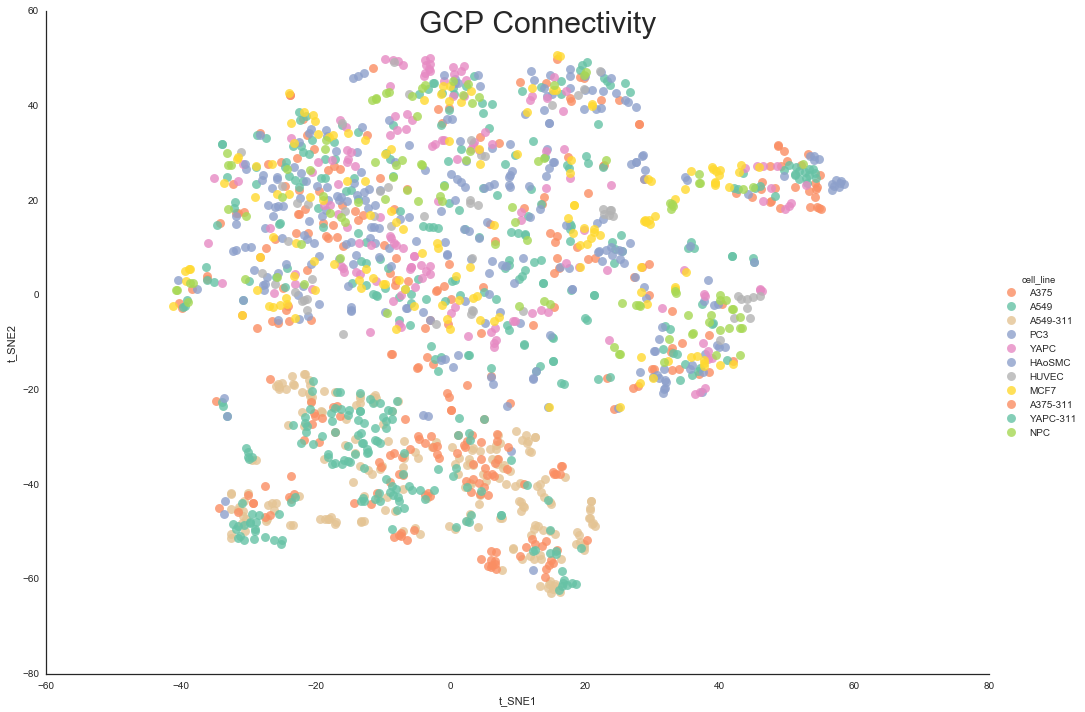

In [162]:
sns.set_style("white")
t_SNE1 = X_embedded[:,0]
t_SNE2 = X_embedded[:,1]
color = cell_id_order
df = pd.DataFrame(dict(t_SNE1=t_SNE1, t_SNE2=t_SNE2, cell_line=color))
plt.rcParams['figure.figsize'] = [14, 10]
ax = sns.lmplot('t_SNE1', 't_SNE2', data=df, hue='cell_line', size=10, palette=color_map, aspect=1.4, fit_reg=False, scatter_kws={"s": 80})
fig = ax.fig
fig.suptitle('GCP Connectivity', fontsize=30)
# ax.set_xlabel("t_SNE dimension1",fontsize=30)
# set_title("GCP Connectivity")


In [144]:
_colors = set(color)
rgb_values = sns.color_palette("Set2",11);

color_map = dict(zip(_colors, rgb_values));

In [143]:
len(_colors)

11

In [126]:
for f in gcp_keys:
     if (lincs_gcp_drugs[f].shape[1]==32):
            if (f != 'LINCS_P100_DIA_Plate59') & (f != 'LINCS_P100_DIA_Plate58'):
                if ( f != 'LINCS_GCP_PlateZ'):
                    print f

LINCS_GCP_Plate59
LINCS_GCP_Plate58
LINCS_GCP_Plate53
LINCS_GCP_Plate52
LINCS_GCP_Plate51
LINCS_GCP_Plate34
LINCS_GCP_Plate19
LINCS_GCP_Plate18
LINCS_GCP_Plate31
LINCS_GCP_Plate30
LINCS_GCP_Plate33
LINCS_GCP_Plate32
LINCS_GCP_Plate39
LINCS_GCP_Plate38
LINCS_GCP_Plate15
LINCS_GCP_Plate17
LINCS_GCP_Plate61
LINCS_GCP_Plate41
LINCS_GCP_Plate42
LINCS_GCP_Plate25
LINCS_GCP_Plate44
LINCS_GCP_Plate23
LINCS_GCP_Plate20
LINCS_GCP_Plate48
LINCS_GCP_Plate28
LINCS_GCP_Plate29
LINCS_GCP_Plate27
LINCS_GCP_Plate24
